In [120]:


import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from IPython.display import display
rcParams.update({'figure.autolayout': True})
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
import sys
import collections
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
import ipywidgets as widgets
from ipywidgets import interact, fixed
plt.tight_layout()



In [121]:
srr_mdata = pd.read_csv("../data/ONT_Illumina_TRACE_test_set.csv")
galaxy_df = pd.read_csv("../data/galaxy.csv", sep=",")
ec19_df = pd.read_csv("../data/ONT_illumina_TRACE_test_result_with_metadata.txt", sep="\t")

In [122]:
sync_galaxy_df = galaxy_df[galaxy_df['Accession'].isin(ec19_df['Accession'].to_list())]
sync_galaxy_df = sync_galaxy_df.merge(srr_mdata, how="left", left_on="Accession", right_on="acc")
sync_ec19_df = ec19_df[ec19_df['Accession'].isin(galaxy_df['Accession'].to_list())]
sync_galaxy_df
# sync_ec19_df

,Group_Name,Accession,Pos,Ref,Alt,DP,G_AD_2,Alt_Freq,acc,biosample,platform,bioproject,center_name,librarylayout,libraryselection,librarysource,attributes
0,Galaxy,ERR4364963,241,C,T,5214,5122,0.931722,ERR4364963,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22\nsample_captur...
1,Galaxy,ERR4364963,3037,C,T,2363,2359,0.898857,ERR4364963,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22\nsample_captur...
2,Galaxy,ERR4364963,4186,T,C,11959,11948,0.848399,ERR4364963,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22\nsample_captur...
3,Galaxy,ERR4364963,11801,G,A,11410,11403,0.947502,ERR4364963,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22\nsample_captur...
4,Galaxy,ERR4364963,14408,C,T,13681,13671,0.957971,ERR4364963,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22\nsample_captur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,Galaxy,SRR13870639,18082,A,G,269,225,0.929752,SRR13870639,SAMN18188233,OXFORD_NANOPORE,PRJNA707211,UNIVERSITY OF TEXAS MEDICAL BRANCH,SINGLE,RT-PCR,VIRAL RNA,collection_date_sam: 2020-04\nprimary_search: ...
4756,Galaxy,SRR13870639,23403,A,G,324,281,0.843844,SRR13870639,SAMN18188233,OXFORD_NANOPORE,PRJNA707211,UNIVERSITY OF TEXAS MEDICAL BRANCH,SINGLE,RT-PCR,VIRAL RNA,collection_date_sam: 2020-04\nprimary_search: ...
4757,Galaxy,SRR13870639,25563,G,T,368,377,0.933168,SRR13870639,SAMN18188233,OXFORD_NANOPORE,PRJNA707211,UNIVERSITY OF TEXAS MEDICAL BRANCH,SINGLE,RT-PCR,VIRAL RNA,collection_date_sam: 2020-04\nprimary_search: ...
4758,Galaxy,SRR13870639,27357,A,G,551,455,0.806738,SRR13870639,SAMN18188233,OXFORD_NANOPORE,PRJNA707211,UNIVERSITY OF TEXAS MEDICAL BRANCH,SINGLE,RT-PCR,VIRAL RNA,collection_date_sam: 2020-04\nprimary_search: ...


In [123]:
sync_galaxy_df['galaxy_vars'] = sync_galaxy_df['Accession'].astype(str) + "_" + sync_galaxy_df['Pos'].astype(str)
sync_ec19_df['ec19_vars'] = sync_ec19_df['Accession'].astype(str) + "_" + sync_ec19_df['Pos'].astype(str)
sync_galaxy_df.head()
sync_ec19_df.head()

<ipython-input-123-ab10464c1da3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sync_ec19_df['ec19_vars'] = sync_ec19_df['Accession'].astype(str) + "_" + sync_ec19_df['Pos'].astype(str)


,Group_Name,Accession,Pos,Ref,Alt,DP,G_AD_2,Alt_Freq,biosample,platform,bioproject,center_name,librarylayout,libraryselection,librarysource,attributes,ec-19_run_with_primer_trim,ec19_vars
0,LANL,ERR4364963,241,C,T,3510,3441,0.9806,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3,ERR4364963_241
1,LANL,ERR4364963,3037,C,T,1752,1750,0.9994,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3,ERR4364963_3037
2,LANL,ERR4364963,4186,T,C,6464,6462,0.9998,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3,ERR4364963_4186
3,LANL,ERR4364963,11801,G,A,6513,6511,0.9997,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3,ERR4364963_11801
4,LANL,ERR4364963,14408,C,T,6418,6414,0.9995,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3,ERR4364963_14408


In [124]:
sync_galaxy_ont = sync_galaxy_df[sync_galaxy_df['platform'] == "OXFORD_NANOPORE"]
sync_galaxy_ill = sync_galaxy_df[sync_galaxy_df['platform'] == "ILLUMINA"]
sync_ec19_ont= sync_ec19_df[sync_ec19_df['platform'] == "OXFORD_NANOPORE"]
sync_ec19_ill= sync_ec19_df[sync_ec19_df['platform'] == "ILLUMINA"]
sync_ec19_ill.head()

,Group_Name,Accession,Pos,Ref,Alt,DP,G_AD_2,Alt_Freq,biosample,platform,bioproject,center_name,librarylayout,libraryselection,librarysource,attributes,ec-19_run_with_primer_trim,ec19_vars
0,LANL,ERR4364963,241,C,T,3510,3441,0.9806,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3,ERR4364963_241
1,LANL,ERR4364963,3037,C,T,1752,1750,0.9994,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3,ERR4364963_3037
2,LANL,ERR4364963,4186,T,C,6464,6462,0.9998,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3,ERR4364963_4186
3,LANL,ERR4364963,11801,G,A,6513,6511,0.9997,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3,ERR4364963_11801
4,LANL,ERR4364963,14408,C,T,6418,6414,0.9995,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3,ERR4364963_14408


In [154]:
def check_overlap(row):
    if collections.Counter(row['galaxy']) == collections.Counter(row['ec19']):
        return True
    else:
        return False

def find_unique(list1):
    gx_pos = row['galaxy'].to_list()
    ec19_pos = row['ec19'].to_list()
    gx_unq = np.setdiff1d(gx_pos,ec19_pos)
    ec19_unq = np.setdiff1d(ec19_pos, gx_pos)
    return gx_unq

def merge_gx_ec19(galaxy_df, ec19_df):
    ec19_gx_ont = pd.concat([galaxy_df[['Group_Name', 'Accession', 'Pos']], ec19_df[['Group_Name', 'Accession', 'Pos']]], ignore_index=True)
    gx_all_pos = galaxy_df.groupby(['Accession'])['Pos'].apply(list).reset_index()
    ec19_all_pos = ec19_df.groupby(['Accession'])['Pos'].apply(list).reset_index()
    sync_all_pos = ec19_all_pos.merge(gx_all_pos, on="Accession")
    sync_all_pos.columns = ["acc", "galaxy", "ec19"]
    return sync_all_pos

def compare_srrs(merged_df):
    merged_df['overlapped'] = merged_df.apply(check_overlap, axis=1)
    return merged_df.groupby('overlapped').agg('count').reset_index()

ont_comp_df = merge_gx_ec19(sync_ec19_ont, sync_galaxy_ont)
ill_comp_df= merge_gx_ec19(sync_ec19_ill, sync_galaxy_ill)
ill_comp_df
# compare_srrs(ont_comp_df)
# compare_srrs(ill_comp_df)
# ont_comp_df['galaxy_unq'] = ont_comp_df.apply(lambda row: np.setdiff1d(row["galaxy"], row["ec19"]), axis=1)
# ont_comp_df['ec19_unq'] = ont_comp_df.apply(lambda row: np.setdiff1d(row["ec19"], row["galaxy"]), axis=1)
ill_comd_df

,overlapped,acc,galaxy,ec19
0,False,78,78,78
1,True,42,42,42


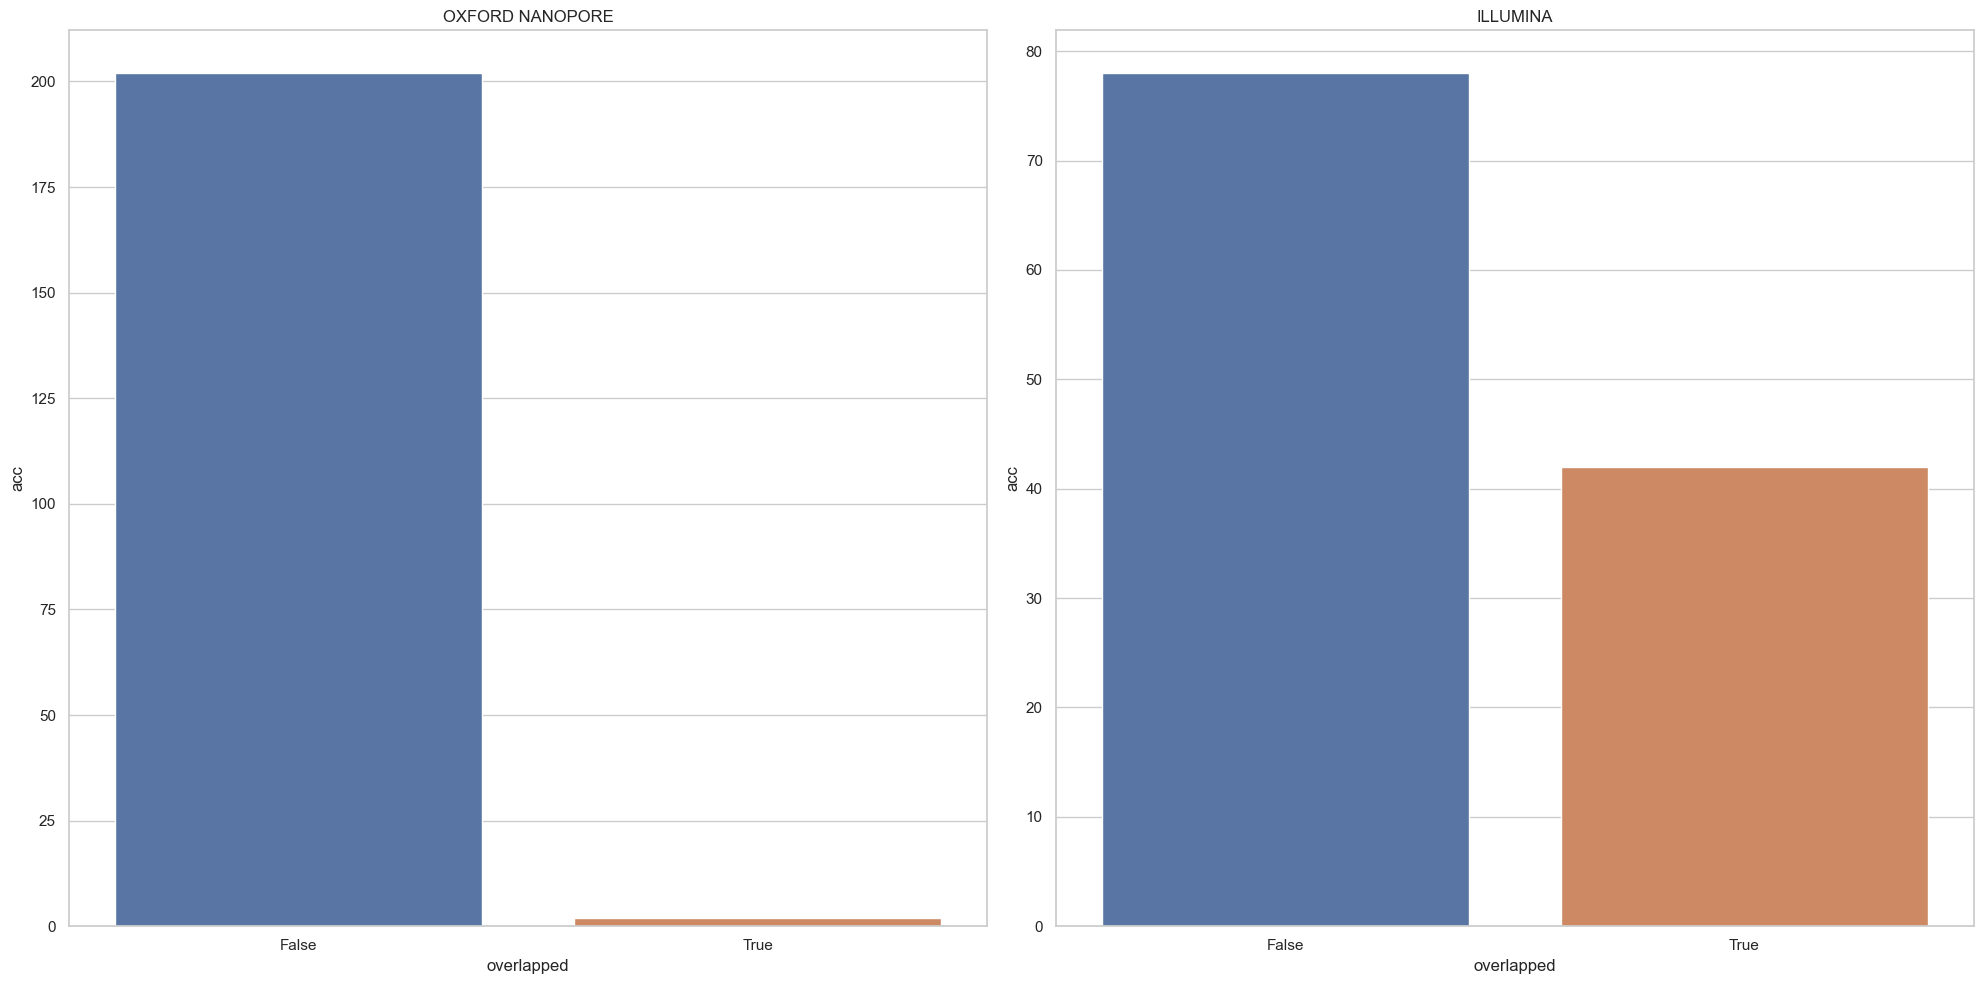

In [147]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.set_theme(style="whitegrid")
ax=sns.barplot(data=compare_srrs(ont_comp_df), x="overlapped", y="acc")
ax.set_title('OXFORD NANOPORE')
plt.subplot(1,2,2)
sns.set_theme(style="whitegrid")
ax=sns.barplot(data=compare_srrs(ill_comp_df), x="overlapped", y="acc")
ax.set_title('ILLUMINA')
plt.show()

In [148]:
ill_comd_df

,overlapped,acc,galaxy,ec19
0,False,78,78,78
1,True,42,42,42


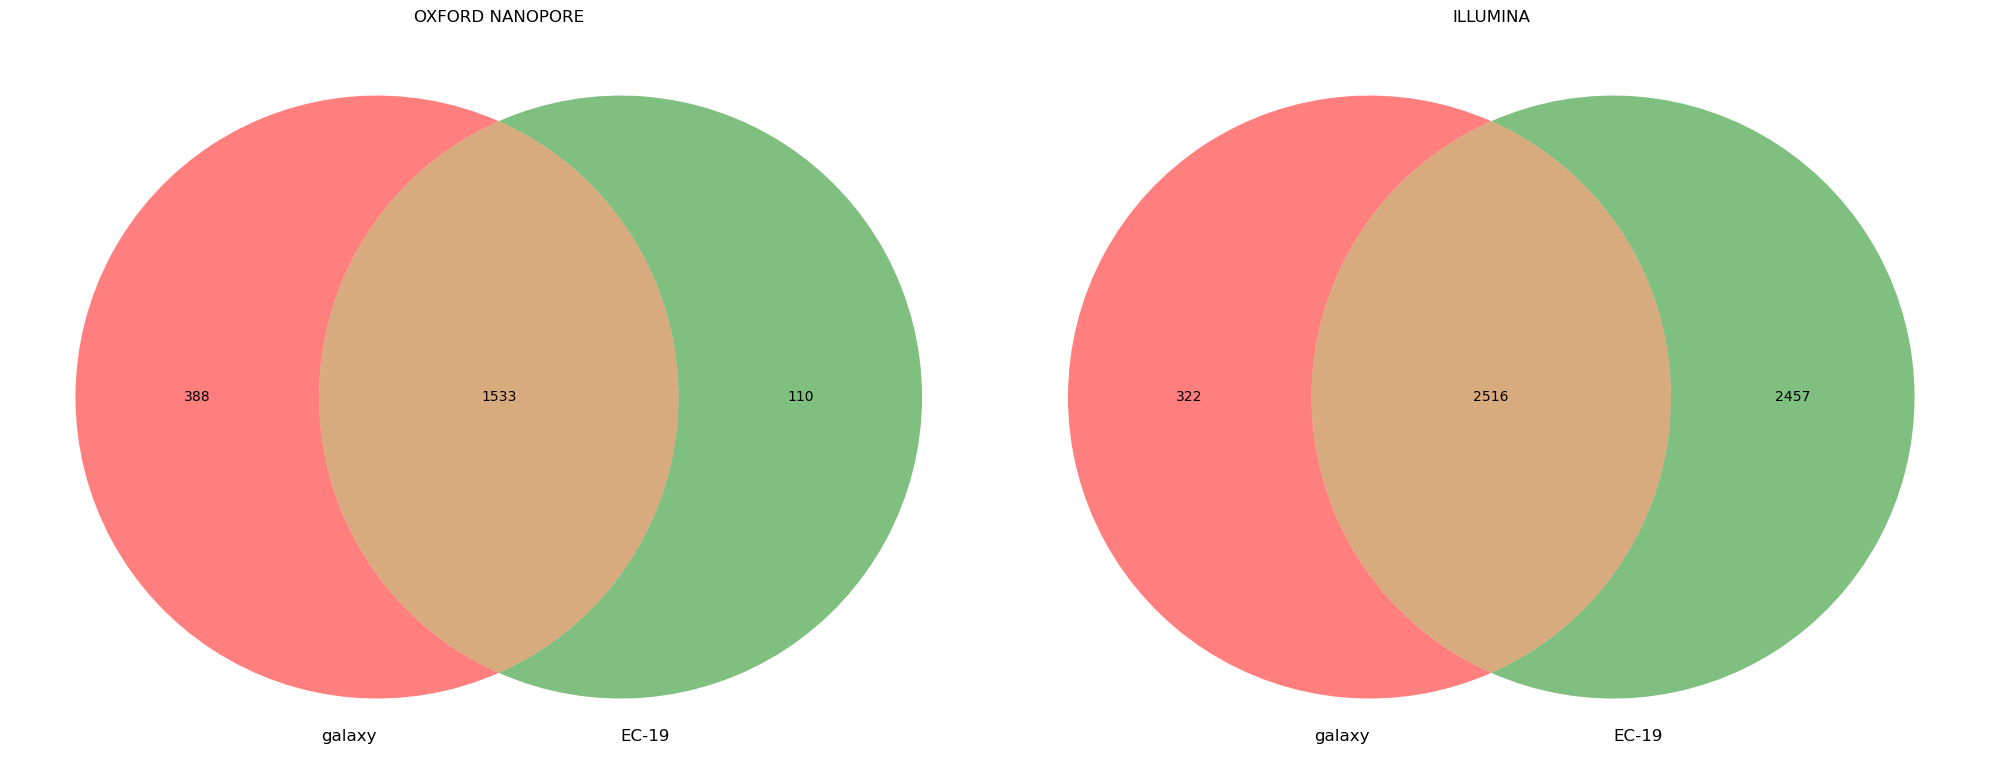

In [128]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
venn2_unweighted([set(sync_galaxy_ill['galaxy_vars'].to_list()), set(sync_ec19_ill['ec19_vars'].to_list())], set_labels = ('galaxy', 'EC-19'), alpha = 0.5)
plt.title("OXFORD NANOPORE")
plt.subplot(1, 2, 2)
venn2_unweighted([set(sync_galaxy_ont['galaxy_vars'].to_list()), set(sync_ec19_ont['ec19_vars'].to_list())], set_labels = ('galaxy', 'EC-19'), alpha = 0.5)
plt.title("ILLUMINA")
plt.show()
